In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from math import sqrt
import math
from scipy.stats import norm as detnorm

from matplotlib.mlab import PCA
import numpy as np
import numpy.linalg as linalg
from random import sample
import csv
import copy
import os
from sklearn.metrics import confusion_matrix 

import glob
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
np.random.seed(1337)

In [40]:
def func2(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes =["o","1","4","6","z"] 
    #classes=["highway","mountain","forst","str","insc"]
    #classes =["a","ai","cha","la","da"] 
    #classes =[","cha","la","da"] 
    #classes =["0","1"] 
    # classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [41]:
def ROC (P,T):
    inc = 0.001
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(1000) # change accordingly with inc
    FPR = np.zeros(1000)
    i = 0
    #print(n)
    for tet in np.arange(0.0, 1.0, inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    plt.plot(FPR,TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
def ROCmodf (P,T,num):
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(num+2) # change accordingly with inc
    FPR = np.zeros(num+2)
    i = 0
    #print(n)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)   
        i = i + 1
    plt.plot(FPR,TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
def DETmodf (P,T,num):
    dnorm = lambda t:(detnorm.ppf(t))
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    FPR = np.zeros(num+2) # change accordingly with inc
    FNR = np.zeros(num+2)
    i = 0
    #print(inc)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        FNR[i] = FN/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    FPR1 = (np.array([dnorm(xi) for xi in FPR]))
    FNR1 = (np.array([dnorm(xi) for xi in FNR]))
    #print(FPR1)
    #print(FNR1)
    #detection_error_tradeoff(FPR1,FNR1)
    plt.plot(FPR1,FNR1)
    plt.show()

In [10]:
sypath = r'/home/moiz/Documents/PRMLlab4/6'
trdata = np.loadtxt(sypath+"/train.txt",delimiter=",")
y_trdata = np.reshape(trdata[:,2],(-1,1))
X_trdata = trdata[:,0:2]
# data1=data[np.nonzero(labels[:,0]==1)]
# sydata1=pd.DataFrame(data1,index=None)
# sydata1=sydata1.loc[:,0:1]

# data2=data[np.nonzero(labels[:,0]==2)]
# sydata2=pd.DataFrame(data2,index=None)
# sydata2=sydata2.loc[:,0:1]

# sydata1.reset_index()
# sydata2.reset_index()

tedata = np.loadtxt(sypath+"/dev.txt",delimiter=",")
y_tedata = np.reshape(tedata[:,2],(-1,1))
X_tedata = tedata[:,0:2]

# data1=data[np.nonzero(labels[:,0]==1)]
# syddata1=pd.DataFrame(data1,index=None)
# syddata1=syddata1.loc[:,0:1]
# data2=data[np.nonzero(labels[:,0]==2)]
# syddata2=pd.DataFrame(data2,index=None)
# syddata2=syddata2.loc[:,0:1]
# syddata1.reset_index()
# syddata2.reset_index()

In [11]:
# print(y_trdata)

In [12]:
## resclae
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Train
X_train_scaled = scaler.fit_transform(X_trdata.astype(np.float64))
# test
X_test_scaled = scaler.fit_transform(X_tedata.astype(np.float64))

In [13]:
print(np.shape(X_train_scaled))

(2500, 2)


In [14]:
from sklearn.neural_network import MLPClassifier

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(50,10),activation='relu')
clf.fit(X_trdata,y_trdata)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
clf.score(X_tedata,y_tedata)

0.998

In [17]:
import tensorflow as tf
model_syn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model_syn.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model_syn.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 2,362
Trainable params: 2,362
Non-trainable params: 0
_________________________________________________________________


In [18]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
label_one_hot= onehotencoder.fit_transform(y_trdata).toarray() 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [19]:
print(y_trdata)

[[1.]
 [1.]
 [1.]
 ...
 [2.]
 [2.]
 [2.]]


In [20]:
#from keras.utils import to_categorical
#label_one_hot = to_categorical(y_trdata)
model_syn.fit(X_trdata,label_one_hot,epochs=50)

Train on 2500 samples
Epoch 1/50
2500/2500 [==============================] - 1s 324us/sample - loss: 0.6549 - acc: 0.5972
Epoch 2/50
2500/2500 [==============================] - 0s 56us/sample - loss: 0.5854 - acc: 0.6176
Epoch 3/50
2500/2500 [==============================] - 0s 56us/sample - loss: 0.5549 - acc: 0.6252
Epoch 4/50
2500/2500 [==============================] - 0s 68us/sample - loss: 0.5262 - acc: 0.6548
Epoch 5/50
2500/2500 [==============================] - 0s 68us/sample - loss: 0.4905 - acc: 0.6884
Epoch 6/50
2500/2500 [==============================] - 0s 55us/sample - loss: 0.4351 - acc: 0.7312
Epoch 7/50
2500/2500 [==============================] - 0s 57us/sample - loss: 0.3663 - acc: 0.7588
Epoch 8/50
2500/2500 [==============================] - 0s 55us/sample - loss: 0.3120 - acc: 0.8668
Epoch 9/50
2500/2500 [==============================] - 0s 53us/sample - loss: 0.2353 - acc: 0.9048
Epoch 10/50
2500/2500 [==============================] - 0s 53us/sample - los

Text(0.5, 1.0, 'Decision boundary and Surface of ANN synthetic dataset')

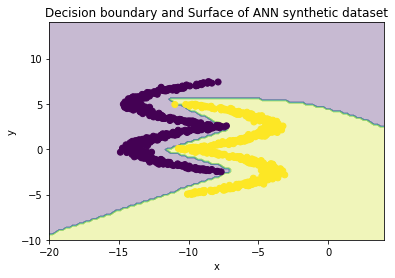

In [362]:
nx,ny = 100,100

y = np.linspace(-10,14,ny)
x = np.linspace(-20,4,nx)
A,B = np.meshgrid(x,y)
z = np.zeros((nx,ny))
for i in range(nx):
    #print(i)
    for j in range(ny):
        z[i,j] = np.argmax(model_syn.predict(np.array([[A[i,j],B[i,j]]])),axis=1)

        
plt.xlabel("x")
plt.ylabel("y")
#plt.xlim(x_l,x_r)

plt.contourf(A,B,z,alpha=0.3)
plt.scatter(tedata[:,0],tedata[:,1],c =tedata[:,2] )
plt.title("Decision boundary and Surface of ANN synthetic dataset")
#plt.savefig('NN-synthetic-decision-998-2hidden.jpg')

In [186]:
# X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

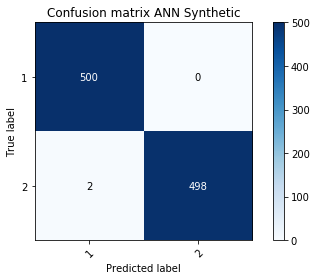

In [21]:
Predicted = model_syn.predict_classes(X_tedata)

prob =model_syn.predict(X_tedata)

T=np.full(500,0,dtype='int')
T = np.concatenate((T,np.full(500,1,dtype='int')))


print(T)

func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix ANN Synthetic')



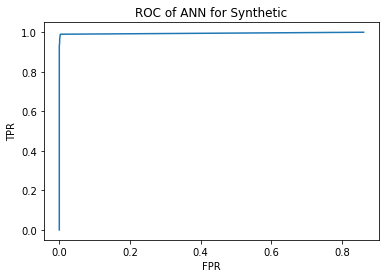

In [368]:
plt.title("ROC of ANN for Synthetic")
ROCmodf(prob,T,100)

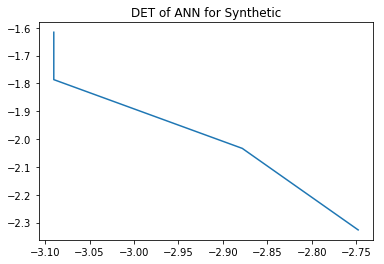

In [369]:
plt.title("DET of ANN for Synthetic")
DETmodf(prob,T,100)

In [6]:
def redundancy(files,res_dim):
    train = []
    traincounts = []
    for e in files:
        a = np.loadtxt(e)
        a1 = np.reshape(a[1:],(-1,2))
        a1[:,0] = (a1[:,0]-a1[:,0].min())/(a1[:,0].max()-(a1[:,0].min()))
        a1[:,1] = (a1[:,1]-a1[:,1].min())/(a1[:,1].max()-(a1[:,1].min()))
        curr = int(a[0])
        x,y =[],[]
        for i in range(int(curr)):
            x +=[a1[:,0][i]]*(res_dim//curr + int(res_dim%curr>i))
            y +=[a1[:,1][i]]*(res_dim//curr + int(res_dim%curr>i))
        train+=[np.reshape([[i,j] for i,j in zip(x,y)],(1,-1))[0]]
        traincounts+=[a[0]]
    return train,traincounts

trainfiles = glob.glob('/home/moiz/Documents/PRML3/*/train/*.txt',recursive=True)
testfiles = glob.glob('/home/moiz/Documents/PRML3/*/dev/*.txt',recursive=True)



X_htrdata,_ = redundancy(trainfiles,178)
X_htedata,_ = redundancy(testfiles,178)
X_htrdata = np.array(X_htrdata)
X_htedata = np.array(X_htedata)
mapping = {}
mapping['a'] = 3.
mapping['ai'] = 2.
mapping['chA'] = 5.
mapping['dA'] = 4.
mapping['lA'] = 1.
y_htrdata=[]
for i in trainfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_htrdata.append(x)
y_htrdata=np.array(y_htrdata)

y_htedata=[]
for i in testfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_htedata.append(x)
y_htedata=np.array(y_htedata)

In [371]:
import tensorflow as tf
model_h = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(X_htrdata.shape[1],)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='sigmoid')
])
model_h.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model_h.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 100)               35700     
_________________________________________________________________
dense_61 (Dense)             (None, 40)                4040      
_________________________________________________________________
dropout_20 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 5)                 205       
Total params: 39,945
Trainable params: 39,945
Non-trainable params: 0
_________________________________________________________________


In [372]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
label_one_hot= onehotencoder.fit_transform(y_htrdata).toarray() 

print(np.shape(label_one_hot))

(346, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [373]:
model_h.fit(X_htrdata,label_one_hot,epochs=40)

Train on 346 samples
Epoch 1/40
346/346 [==============================] - 0s 726us/sample - loss: 1.6033 - acc: 0.3324
Epoch 2/40
346/346 [==============================] - 0s 116us/sample - loss: 1.4779 - acc: 0.4133
Epoch 3/40
346/346 [==============================] - 0s 105us/sample - loss: 1.3674 - acc: 0.4884
Epoch 4/40
346/346 [==============================] - 0s 122us/sample - loss: 1.2696 - acc: 0.5491
Epoch 5/40
346/346 [==============================] - 0s 106us/sample - loss: 1.1871 - acc: 0.5549
Epoch 6/40
346/346 [==============================] - 0s 119us/sample - loss: 1.1114 - acc: 0.6012
Epoch 7/40
346/346 [==============================] - 0s 102us/sample - loss: 1.0536 - acc: 0.6301
Epoch 8/40
346/346 [==============================] - 0s 99us/sample - loss: 0.9775 - acc: 0.6618
Epoch 9/40
346/346 [==============================] - 0s 123us/sample - loss: 0.9574 - acc: 0.6618
Epoch 10/40
346/346 [==============================] - 0s 116us/sample - loss: 0.8697 - a

In [374]:
Predicted = model_h.predict_classes(X_htedata)

In [375]:
print(Predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [376]:
prob=model_h.predict(X_htedata)

In [377]:
T=np.full(20,0,dtype='int')
T = np.concatenate((T,np.full(20,1,dtype='int')))
T = np.concatenate((T,np.full(20,2,dtype='int')))
T = np.concatenate((T,np.full(20,3,dtype='int')))
T = np.concatenate((T,np.full(20,4,dtype='int')))
#print(T)


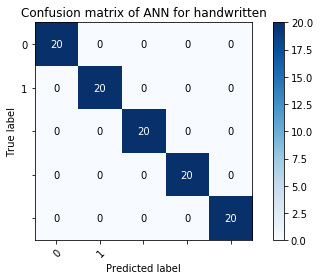

In [378]:
func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix of ANN for handwritten')

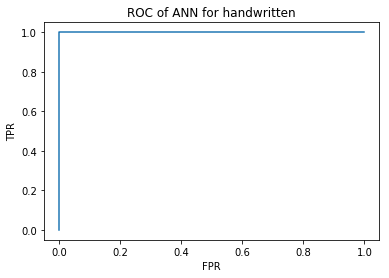

In [379]:
plt.title("ROC of ANN for handwritten")
ROCmodf(prob,T,100)

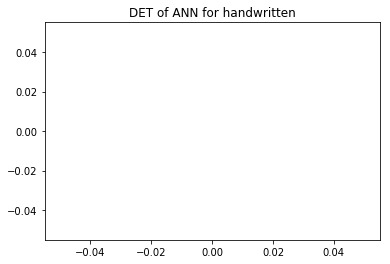

In [381]:
plt.title("DET of ANN for handwritten")
DETmodf(prob,T,100)

In [24]:
trainfiles = glob.glob('/home/moiz/Documents/PRMLlab4/*/train/*.jpg_color_edh_entropy',recursive=True)
testfiles = glob.glob('/home/moiz/Documents/PRMLlab4/*/dev/*.jpg_color_edh_entropy',recursive=True)
def load_data(files):
    data =[]
    for i in files:
        data+=[np.reshape(np.loadtxt(i),(-1))]
    return np.array(data)
X_itrdata = load_data(trainfiles)
X_itedata = load_data(testfiles)

In [25]:
# trainfiles

In [26]:
mapping = {}
mapping['highway'] = 0
mapping['mountain'] = 1
mapping['forest'] = 2
mapping['street'] = 3
mapping['insidecity'] = 4
y_itrdata=[]
for i in trainfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_itrdata.append(x)
y_itrdata=np.array(y_itrdata)

y_itedata=[]
for i in testfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_itedata.append(x)
y_itedata=np.array(y_itedata)

In [27]:
import tensorflow as tf
model_i = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid', input_shape=(X_itrdata.shape[1],)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='sigmoid')
])
model_i.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model_i.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               82900     
_________________________________________________________________
dense_4 (Dense)              (None, 40)                4040      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 205       
Total params: 87,145
Trainable params: 87,145
Non-trainable params: 0
_________________________________________________________________


In [28]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
label_one_hot= onehotencoder.fit_transform(y_itrdata).toarray() 

print(np.shape(label_one_hot))

(1091, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [29]:
model_i.fit(X_itrdata,label_one_hot,epochs=40)

Train on 1091 samples
Epoch 1/40
1091/1091 [==============================] - 0s 222us/sample - loss: 1.6093 - acc: 0.2328
Epoch 2/40
1091/1091 [==============================] - 0s 113us/sample - loss: 1.5552 - acc: 0.2713
Epoch 3/40
1091/1091 [==============================] - 0s 122us/sample - loss: 1.5088 - acc: 0.3327
Epoch 4/40
1091/1091 [==============================] - 0s 111us/sample - loss: 1.4372 - acc: 0.3877
Epoch 5/40
1091/1091 [==============================] - 0s 101us/sample - loss: 1.3805 - acc: 0.4290
Epoch 6/40
1091/1091 [==============================] - 0s 129us/sample - loss: 1.3190 - acc: 0.4766
Epoch 7/40
1091/1091 [==============================] - 0s 108us/sample - loss: 1.2360 - acc: 0.5005
Epoch 8/40
1091/1091 [==============================] - 0s 104us/sample - loss: 1.2155 - acc: 0.5408
Epoch 9/40
1091/1091 [==============================] - 0s 110us/sample - loss: 1.1531 - acc: 0.5610
Epoch 10/40
1091/1091 [==============================] - 0s 110us/sam

In [30]:
Predicted = model_i.predict_classes(X_itedata)

In [31]:
prob=model_i.predict(X_itedata)

In [32]:
y_itedata.shape

(313, 1)

In [33]:
Tv = np.zeros(5)
for i in range(np.shape(y_itedata)[0]):
    if(y_itedata[i][0]==0):
        Tv[0]=Tv[0]+1
    if(y_itedata[i][0]==1):
        Tv[1]=Tv[1]+1
    if(y_itedata[i][0]==2):
        Tv[2]=Tv[2]+1
    if(y_itedata[i][0]==3):
        Tv[3]=Tv[3]+1
    if(y_itedata[i][0]==4):
        Tv[4]=Tv[4]+1
    



T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))

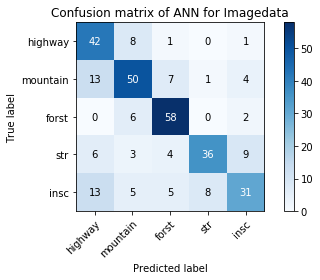

In [34]:
func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix of ANN for Imagedata')

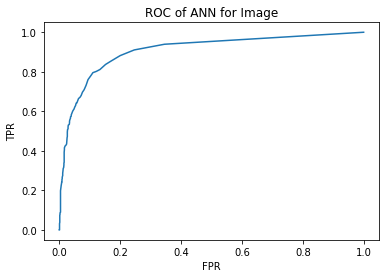

In [35]:
plt.title("ROC of ANN for Image")
ROCmodf(prob,T,100)

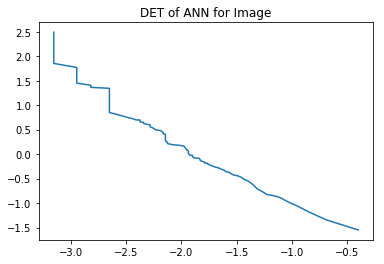

In [36]:
plt.title("DET of ANN for Image")
DETmodf(prob,T,100)

In [54]:
trainfiles = glob.glob('/home/moiz/Documents/PRML3/*/train/*.mfcc',recursive=True)
testfiles = glob.glob('/home/moiz/Documents/PRML3/*/dev/*.mfcc',recursive=True)
def redundancy_v(files,res_dim):
    train = []
    traincounts = []
    for e in files:
        a = np.loadtxt(e,skiprows=1)
        curr = int(a.shape[0])
        res = []
        for i in range(int(curr)):
            res += list(np.tile(a[i],(res_dim//curr + int(res_dim%curr>i))))
        train+=[np.array(res)]
        traincounts+=[curr]
    return train,traincounts

In [55]:
X_vtrdata,_ = redundancy_v(trainfiles,194)
X_vtedata,_ = redundancy_v(testfiles,194)
X_vtrdata = np.array(X_vtrdata)
X_vtedata = np.array(X_vtedata)

In [56]:
# #not useful
# from sklearn.decomposition import PCA
# # pca = PCA(6)
# X = pca.fit_transform(X)
# devX = pca.transform(devX)

mapping = {}
mapping['o'] = 1.
mapping['1'] = 2.
mapping['4'] = 3.
mapping['z'] = 4.
mapping['6'] = 5.
y_vtrdata=[]
for i in trainfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_vtrdata.append(x)
y_vtrdata=np.array(y_vtrdata)

y_vtedata=[]
for i in testfiles:
    x = np.zeros(1)
    x[0]=mapping[(i.split('/')[5])]
    y_vtedata.append(x)
y_vtedata=np.array(y_vtedata)

In [57]:
import tensorflow as tf
model_v = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(X_vtrdata.shape[1],)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='sigmoid')
])
model_v.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model_v.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 300)               2211900   
_________________________________________________________________
dense_10 (Dense)             (None, 30)                9030      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 155       
Total params: 2,221,085
Trainable params: 2,221,085
Non-trainable params: 0
_________________________________________________________________


In [58]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
label_one_hot= onehotencoder.fit_transform(y_vtrdata).toarray() 

print(np.shape(label_one_hot))

(195, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [59]:
model_v.fit(X_vtrdata,label_one_hot,epochs=50)

Train on 195 samples
Epoch 1/50
195/195 [==============================] - 0s 1ms/sample - loss: 2.0910 - acc: 0.2821
Epoch 2/50
195/195 [==============================] - 0s 649us/sample - loss: 1.5582 - acc: 0.3744
Epoch 3/50
195/195 [==============================] - 0s 669us/sample - loss: 1.3858 - acc: 0.4308
Epoch 4/50
195/195 [==============================] - 0s 796us/sample - loss: 1.3528 - acc: 0.4513
Epoch 5/50
195/195 [==============================] - 0s 687us/sample - loss: 1.3176 - acc: 0.4769
Epoch 6/50
195/195 [==============================] - 0s 687us/sample - loss: 1.1870 - acc: 0.5744
Epoch 7/50
195/195 [==============================] - 0s 653us/sample - loss: 1.0705 - acc: 0.5692
Epoch 8/50
195/195 [==============================] - 0s 712us/sample - loss: 1.0347 - acc: 0.6359
Epoch 9/50
195/195 [==============================] - 0s 706us/sample - loss: 0.8956 - acc: 0.5590
Epoch 10/50
195/195 [==============================] - 0s 689us/sample - loss: 0.9285 - ac

In [60]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
  
label_one_hot= onehotencoder.fit_transform(y_vtedata).toarray() 

print(np.shape(label_one_hot))

(60, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [61]:
X_vtedata.shape

(60, 7372)

In [62]:
#model_v.evaluate(X_vtedata,label_one_hot)

In [63]:
Predicted = model_v.predict_classes(X_vtedata)
prob=model_v.predict(X_vtedata)
Tv = np.zeros(5)
for i in range(np.shape(y_vtedata)[0]):
    if(y_vtedata[i][0]==1):
        Tv[0]=Tv[0]+1
    if(y_vtedata[i][0]==2):
        Tv[1]=Tv[1]+1
    if(y_vtedata[i][0]==3):
        Tv[2]=Tv[2]+1
    if(y_vtedata[i][0]==4):
        Tv[3]=Tv[3]+1
    if(y_vtedata[i][0]==5):
        Tv[4]=Tv[4]+1
T=np.full(int(Tv[0]),0,dtype='int')
T = np.concatenate((T,np.full(int(Tv[1]),1,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[2]),2,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[3]),3,dtype='int')))
T = np.concatenate((T,np.full(int(Tv[4]),4,dtype='int')))

In [64]:
Predicted

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

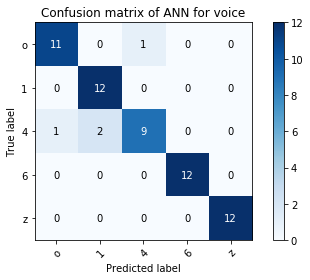

In [65]:
func2(T,Predicted,classes=["1","2","3"],title='Confusion matrix of ANN for voice')

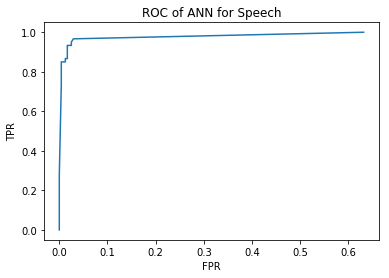

In [66]:
plt.title("ROC of ANN for Speech")
ROCmodf(prob,T,100)

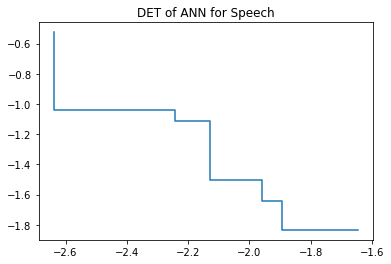

In [67]:
plt.title("DET of ANN for Speech")
DETmodf(prob,T,500)